In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv')
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv')

In [4]:
x.head()

,Unnamed: 0,0
0,0,1.462108
1,1,1.133769
2,2,-2.301539
3,3,1.744812
4,4,0.042214


In [5]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']

In [6]:
x.head()

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

In [7]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, x):
        return self.b0 + self.b1 * x
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X))
    def fit(self, X, Y):  
        alpha = 0.1
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1

In [8]:
hyp = Model()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

0
0
initial error: 2937.6446095153406


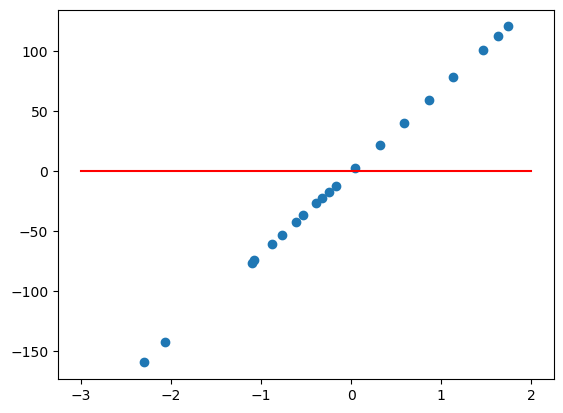

In [9]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [10]:
hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2253.7456808918546


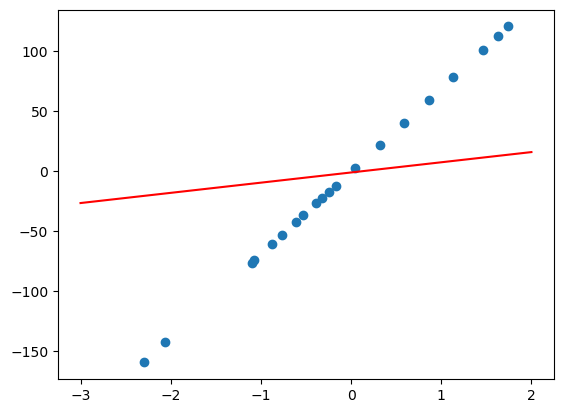

In [11]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [12]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0        
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [13]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2.776975306057215e-06


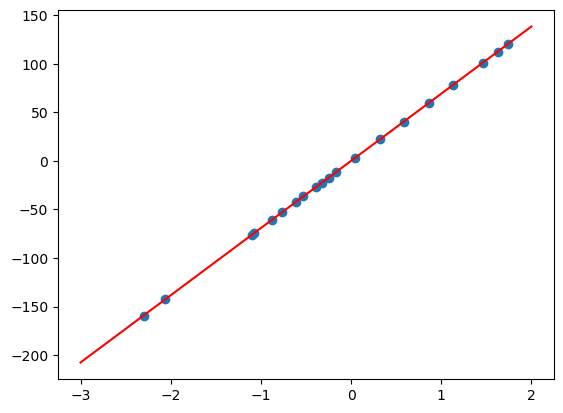

In [14]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

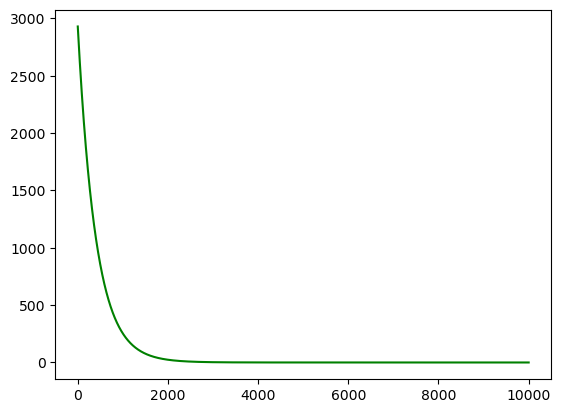

In [15]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

# 1. Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.

error after gradient descent: 1.4035481622976925e-06


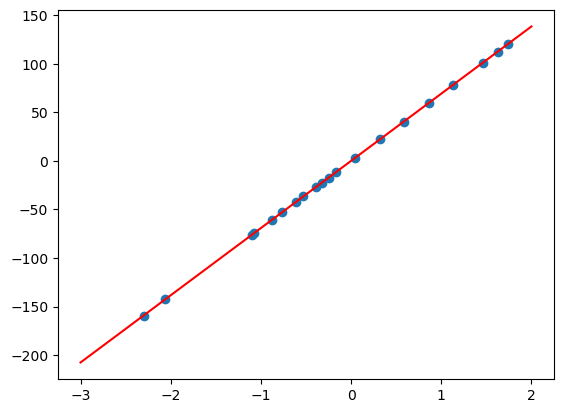

In [16]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 20
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=10000):
        steps, errors = [], []
        step = 0        
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors
    
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

# 2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

error after gradient descent: inf


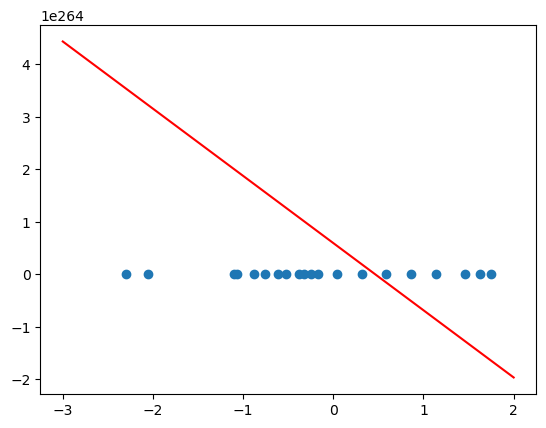

In [17]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=1.6, accuracy=0.01, max_steps=10000):
        steps, errors = [], []
        step = 0        
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors
    
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

# 3. Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.

error after gradient descent: 2.776975306057215e-06


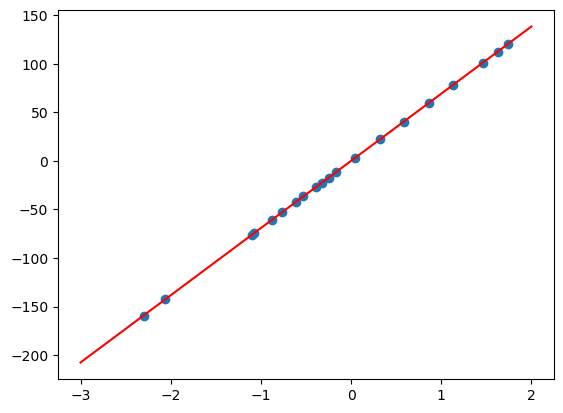

In [18]:
class Model(object):
    """Модель парной линейной регрессии"""
    
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def predict(self, X, x_col=0):
        if str(type(X))=="<class 'pandas.core.frame.DataFrame'>":
            X=X.iloc[:,x_col]
        return self.b0 + self.b1 * X
    
    def error(self, X, Y, x_col=0,y_col=0):
        if str(type(X))=="<class 'pandas.core.frame.DataFrame'>":
            X=X.iloc[:,x_col]
        if str(type(Y))=="<class 'pandas.core.frame.DataFrame'>":
            Y=Y.iloc[:,y_col]
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=10000,til=1e-6, x_col=0,y_col=0):
        if str(type(X))=="<class 'pandas.core.frame.DataFrame'>":
            X=X.iloc[:,x_col]
        if str(type(Y))=="<class 'pandas.core.frame.DataFrame'>":
            Y=Y.iloc[:,y_col]
                
        steps, errors = [], []
        step = 0
        
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
            
        return steps, errors
    
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)

hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

# 4.Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.

error after gradient descent: 0.0005244076717215663


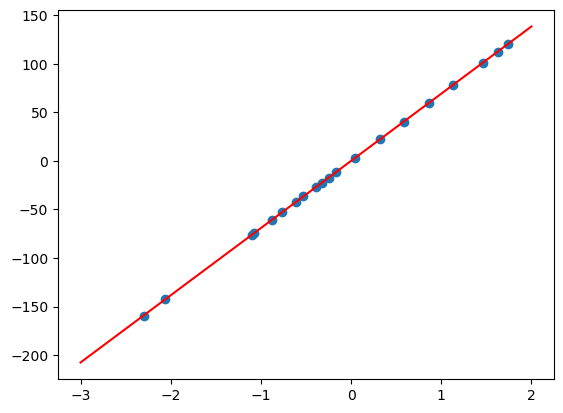

In [19]:
class Model(object):
    """Модель парной линейной регрессии"""
    
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def predict(self, X, x_col=0):
        if str(type(X))=="<class 'pandas.core.frame.DataFrame'>":
            X=X.iloc[:,x_col]
        return self.b0 + self.b1 * X
    
    def error(self, X, Y, x_col=0,y_col=0):
        if str(type(X))=="<class 'pandas.core.frame.DataFrame'>":
            X=X.iloc[:,x_col]
        if str(type(Y))=="<class 'pandas.core.frame.DataFrame'>":
            Y=Y.iloc[:,y_col]
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=10000,til=1e-6, x_col=0,y_col=0):
        if str(type(X))=="<class 'pandas.core.frame.DataFrame'>":
            X=X.iloc[:,x_col]
        if str(type(Y))=="<class 'pandas.core.frame.DataFrame'>":
            Y=Y.iloc[:,y_col]
                
        steps, errors = [], []
        step = 0
        
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
            
            if len(errors)>=2:
                if (errors[-2]-errors[-1])<til:
                    break
        return steps, errors
    
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)

hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

# 5. Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов.

Ошибка перестала существенно меняться
error after gradient descent: 0.0005244076717215663


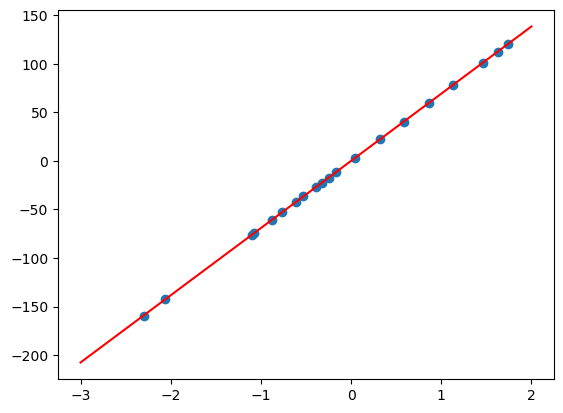

In [20]:
class Model(object):
    """Модель парной линейной регрессии"""
    
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def predict(self, X, x_col=0):
        if str(type(X))=="<class 'pandas.core.frame.DataFrame'>":
            X=X.iloc[:,x_col]
        return self.b0 + self.b1 * X
    
    def error(self, X, Y, x_col=0,y_col=0):
        if str(type(X))=="<class 'pandas.core.frame.DataFrame'>":
            X=X.iloc[:,x_col]
        if str(type(Y))=="<class 'pandas.core.frame.DataFrame'>":
            Y=Y.iloc[:,y_col]
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=10000,til=1e-6, x_col=0,y_col=0):
        if str(type(X))=="<class 'pandas.core.frame.DataFrame'>":
            X=X.iloc[:,x_col]
        if str(type(Y))=="<class 'pandas.core.frame.DataFrame'>":
            Y=Y.iloc[:,y_col]
                
        steps, errors = [], []
        step = 0
        
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
            
            if len(errors)>=2:
                if (errors[-2]-errors[-1])<til:
                    print('Ошибка перестала существенно меняться')
                    break
            elif len(errors)==max_steps:
                print('Все шаги пройдены')
        
        return steps, errors
    
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)

hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

# 6. Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.

Ошибка перестала существенно меняться
error after gradient descent: 0.5204932606756392


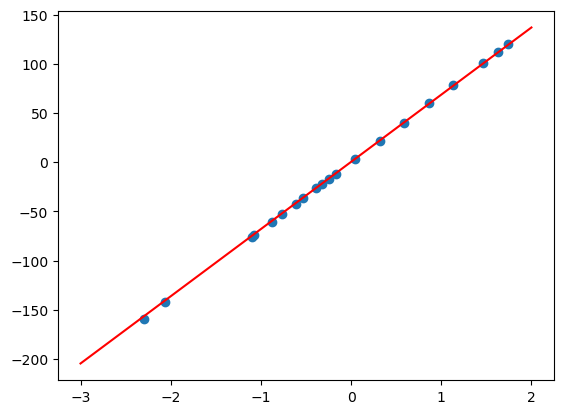

In [21]:
class Model(object):
    """Модель парной линейной регрессии"""
    
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def predict(self, X, x_col=0):
        if str(type(X))=="<class 'pandas.core.frame.DataFrame'>":
            X=X.iloc[:,x_col]
        return self.b0 + self.b1 * X
    
    def error(self, X, Y, x_col=0,y_col=0):
        if str(type(X))=="<class 'pandas.core.frame.DataFrame'>":
            X=X.iloc[:,x_col]
        if str(type(Y))=="<class 'pandas.core.frame.DataFrame'>":
            Y=Y.iloc[:,y_col]
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    
    def fit(self, X, Y, alpha=1, accuracy=0.01, max_steps=10000,til=1e-6, x_col=0,y_col=0):
        if str(type(X))=="<class 'pandas.core.frame.DataFrame'>":
            X=X.iloc[:,x_col]
        if str(type(Y))=="<class 'pandas.core.frame.DataFrame'>":
            Y=Y.iloc[:,y_col]
                
        steps, errors = [], []
        step = 0
        
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
            
            if len(errors)>=2:
                if (errors[-2]-errors[-1])<til:
                    print('Ошибка перестала существенно меняться')
                    break
                
                elif (errors[-2]-errors[-1])>0:
                    alpha=alpha/2
                    
            elif len(errors)==max_steps:
                print('Все шаги пройдены')
        
        return steps, errors
    
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)

hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

# 7. Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.

Ошибка перестала существенно меняться
error after gradient descent: 0.5204932606756392


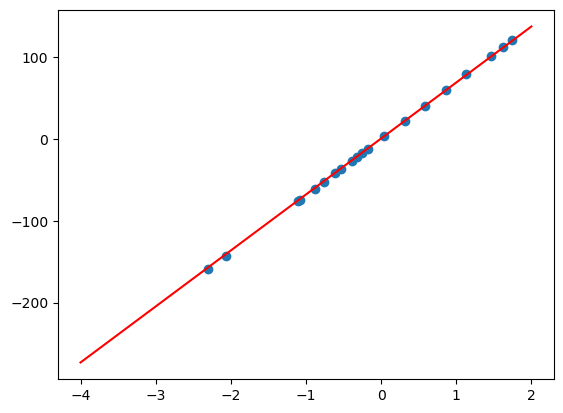

In [22]:
class Model(object):
    """Модель парной линейной регрессии"""
    
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def predict(self, X, x_col=0):
        if str(type(X))=="<class 'pandas.core.frame.DataFrame'>":
            X=X.iloc[:,x_col]
        return self.b0 + self.b1 * X
    
    def error(self, X, Y, x_col=0,y_col=0):
        if str(type(X))=="<class 'pandas.core.frame.DataFrame'>":
            X=X.iloc[:,x_col]
        if str(type(Y))=="<class 'pandas.core.frame.DataFrame'>":
           Y=Y.iloc[:,y_col]
        s = sum(((self.predict(X) - Y)**2) / (2 * len(X)))

        return s
    
    def fit(self, X, Y, alpha=1, accuracy=0.01, max_steps=10000,til=1e-6, x_col=0,y_col=0):
        if str(type(X))=="<class 'pandas.core.frame.DataFrame'>":
            X=X.iloc[:,x_col]
        if str(type(Y))=="<class 'pandas.core.frame.DataFrame'>":
            Y=Y.iloc[:,y_col]
                
        steps, errors = [], []
        step = 0
        
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
            
            if len(errors)>=2:
                if (errors[-2]-errors[-1])<til:
                    print('Ошибка перестала существенно меняться')
                    break
                
                elif (errors[-2]-errors[-1])>0:
                    alpha=alpha/2
                    
                    
                    
                    
            elif len(errors)==max_steps:
                print('Все шаги пройдены')
        
        return steps, errors
    
    def plot(self,X, Y, x_col=0,y_col=0):
        if str(type(X))=="<class 'pandas.core.frame.DataFrame'>":
            X=X.iloc[:,x_col]
        if str(type(Y))=="<class 'pandas.core.frame.DataFrame'>":
            Y=Y.iloc[:,y_col]
        xmin=(min(X)-1)//1
        xmax=(max(X)+1)//1
        X0 = np.linspace(xmin, xmax, 100)
        Y0 = self.predict(X0)
        plt.figure()
        plt.scatter(X, Y)
        plt.plot(X0, Y0, 'r')
        plt.show()
        
    
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)
hyp = Model()

steps, errors = hyp.fit(x, y)

s=hyp.error(x, y)
print("error after gradient descent:", s)

hyp.plot(x,y)